In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose



### **Loading and Transforming the data**

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_csv_data = pd.read_csv("/content/Index2018.csv")
df_comp = raw_csv_data.copy() #copy the data

df_comp['date'] =  pd.to_datetime(df_comp['date'],dayfirst = True)  #To Convert to date time
df_comp.set_index('date',inplace = True)  #set the index to date
df_comp = df_comp.asfreq('b')  #bussiness Days
df_comp = df_comp.fillna(method = 'ffill')


In [4]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [5]:
# Correctly renaming the column in-place
df_comp.rename(columns={'spx': 'market_value'}, inplace=True)


In [6]:
df_comp.head()

,market_value,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [7]:
#Drop the colums expect the market values
df_comp.drop(columns = ['dax','ftse','nikkei'],inplace = True)


In [8]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### **Removing Surplus Data**

In [9]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [10]:
##Make thse split of 80 - 20
size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [11]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [12]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### **The ACF**

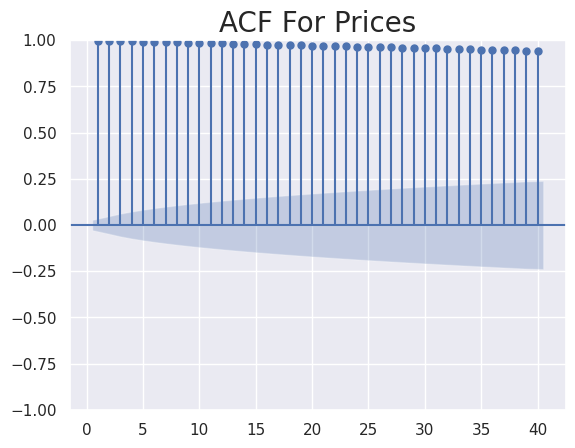

In [13]:
sgt.plot_acf(df['market_value'],zero = False,lags = 40)
plt.title("ACF For Prices",size = 20)
plt.show()

### **The PACF**

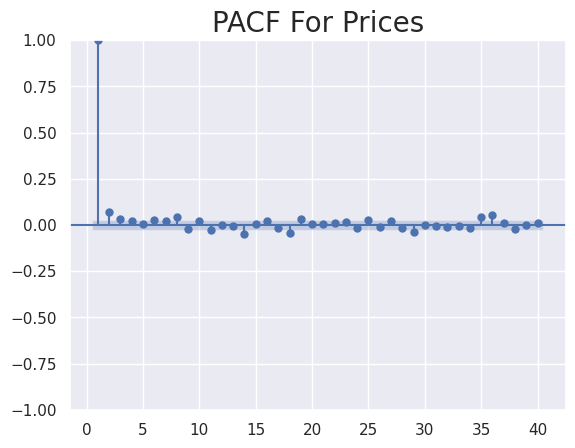

In [14]:
sgt.plot_pacf(df['market_value'],zero = False,lags = 40,method = ('ols'))
plt.title("PACF For Prices",size = 20)
plt.show()

- Cofficients of diffrent size(not all bwtween 0.9 and 1)

- Coefficinets that are negative.


- Coefficients which are not significant.

- Cofficient values will be extermrly close to 0
 - Their impact on the mode is minimal.so they are  not relavent to use.
 - So our model is less than 25 lags.
 -  after 22 lag some  of the are negative
 - The values a month ageo,negativel affect the values today.

### **Fittimg the Model AR(1)**

In [15]:
!pip install statsmodels -q
!pip install statsmodels --upgrade -q


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Use ARIMA with d=0 to fit an ARMA model
model_ar = ARIMA(df['market_value'], order=(1, 0, 1))  # This is an ARMA(1,1) model
result = model_ar.fit()



In [26]:
# Print the summary of the model
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -20085.058
Date:                Fri, 04 Oct 2024   AIC                          40178.116
Time:                        03:44:58   BIC                          40204.201
Sample:                    01-07-1994   HQIC                         40187.256
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6519    116.585      9.364      0.000     863.149    1320.155
ar.L1          0.9989      0.001   1978.857      0.000       0.998       1.000
ma.L1         -0.0734      0.009     -7.807      0.0

### **the DF-Test**

In [32]:
res = sts.adfuller(df['market_value'])
print(res[0])
print(res[1])
print(res[2])
print(res[3])
print(res[4])
print(res[5])

-1.7369847452352456
0.4121645696770613
18
5002
{'1%': -3.431658008603046, '5%': -2.862117998412982, '10%': -2.567077669247375}
39904.880607487445


### **Uisng Returns**

In [39]:
df['returns'] = df['market_value'].pct_change(1).mul(100)
df = df.iloc[1:]

In [40]:
sts.adfuller(df.returns)

(-17.03445719098116,
 8.28053702031718e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)

In [41]:
df['returns']

,returns
date,
1994-01-10,1.142796
1994-01-11,-0.239864
1994-01-12,0.008437
1994-01-13,-0.358521
1994-01-14,0.516435
...,...
2013-04-01,-0.446858
2013-04-02,0.517126
2013-04-03,-1.054943


In [42]:
df.head()

,market_value,returns
date,,
1994-01-10,475.27,1.142796
1994-01-11,474.13,-0.239864
1994-01-12,474.17,0.008437
1994-01-13,472.47,-0.358521
1994-01-14,474.91,0.516435


### **ACF and PACF for Returns**

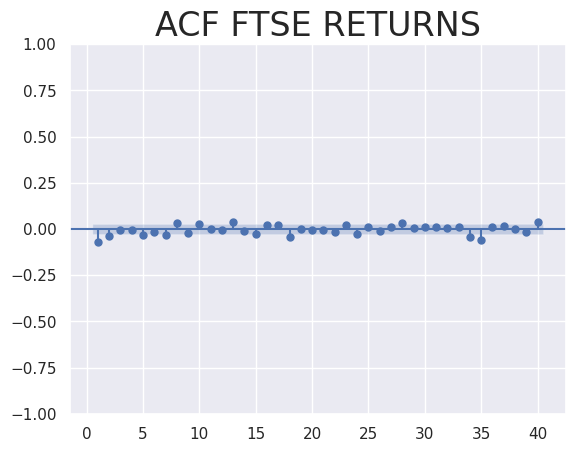

In [43]:
sgt.plot_acf(df.returns,lags = 40,zero = False)
plt.title("ACF FTSE RETURNS",size = 24)
plt.show()

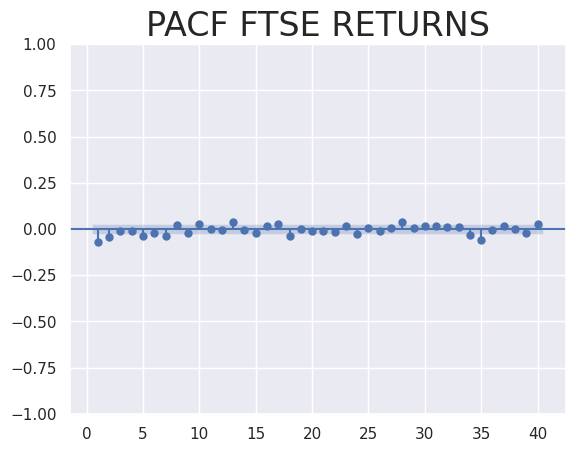

In [45]:
sgt.plot_pacf(df.returns,lags = 40,zero = False, method = ('ols'))
plt.title("PACF FTSE RETURNS",size = 24)
plt.show()

### **Higher Lag AR Models For Returns**